In [37]:
import pandas as pd
from pandas import DataFrame
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [38]:
dataset=pd.read_csv('IRIS.csv')

In [39]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


DATA PREPROCESSING

In [40]:
dataset.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [41]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Outlier Handling

<Axes: ylabel='sepal_length'>

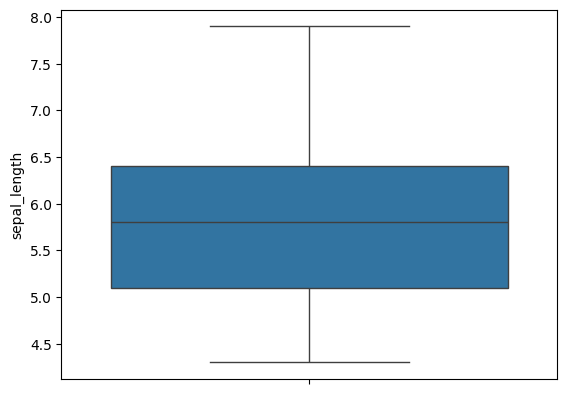

In [42]:
sns.boxplot(dataset["sepal_length"])

<Axes: ylabel='sepal_width'>

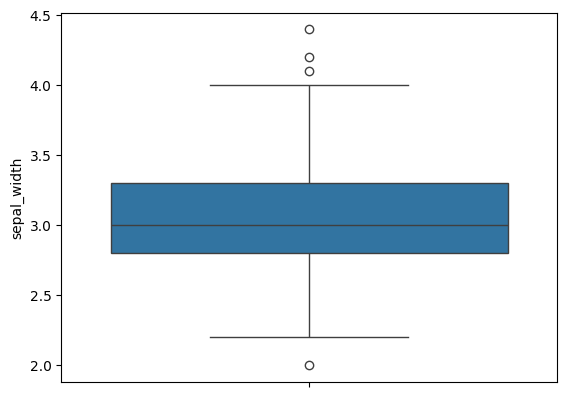

In [43]:
sns.boxplot(dataset["sepal_width"])

In [44]:
Q1 = dataset["sepal_width"].quantile(0.25)
Q3 = dataset["sepal_width"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Remove outliers based on the fences in-place
dataset = dataset.drop(dataset[(dataset["sepal_width"] < lower_fence) | (dataset["sepal_width"] > upper_fence)].index)
dataset.shape

(146, 5)

<Axes: ylabel='petal_length'>

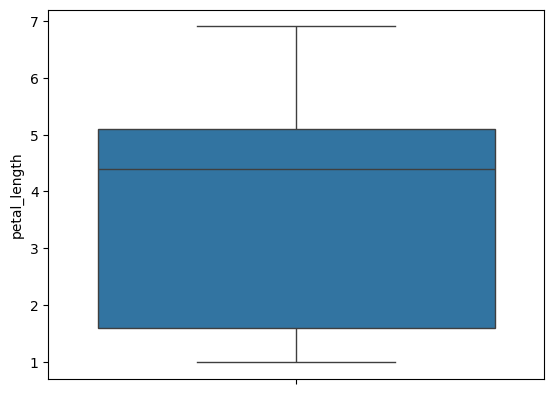

In [45]:
sns.boxplot(dataset["petal_length"])

<Axes: ylabel='petal_width'>

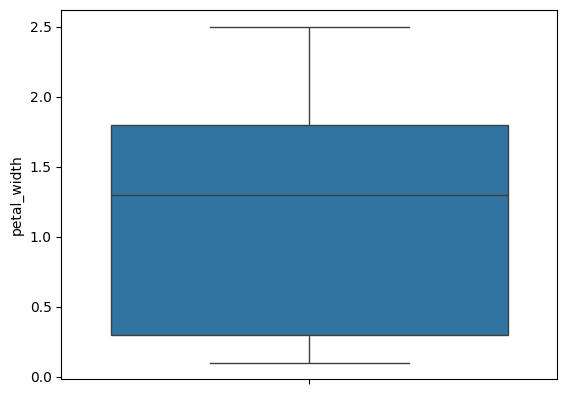

In [46]:
sns.boxplot(dataset["petal_width"])

Handing missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
(146, 5)


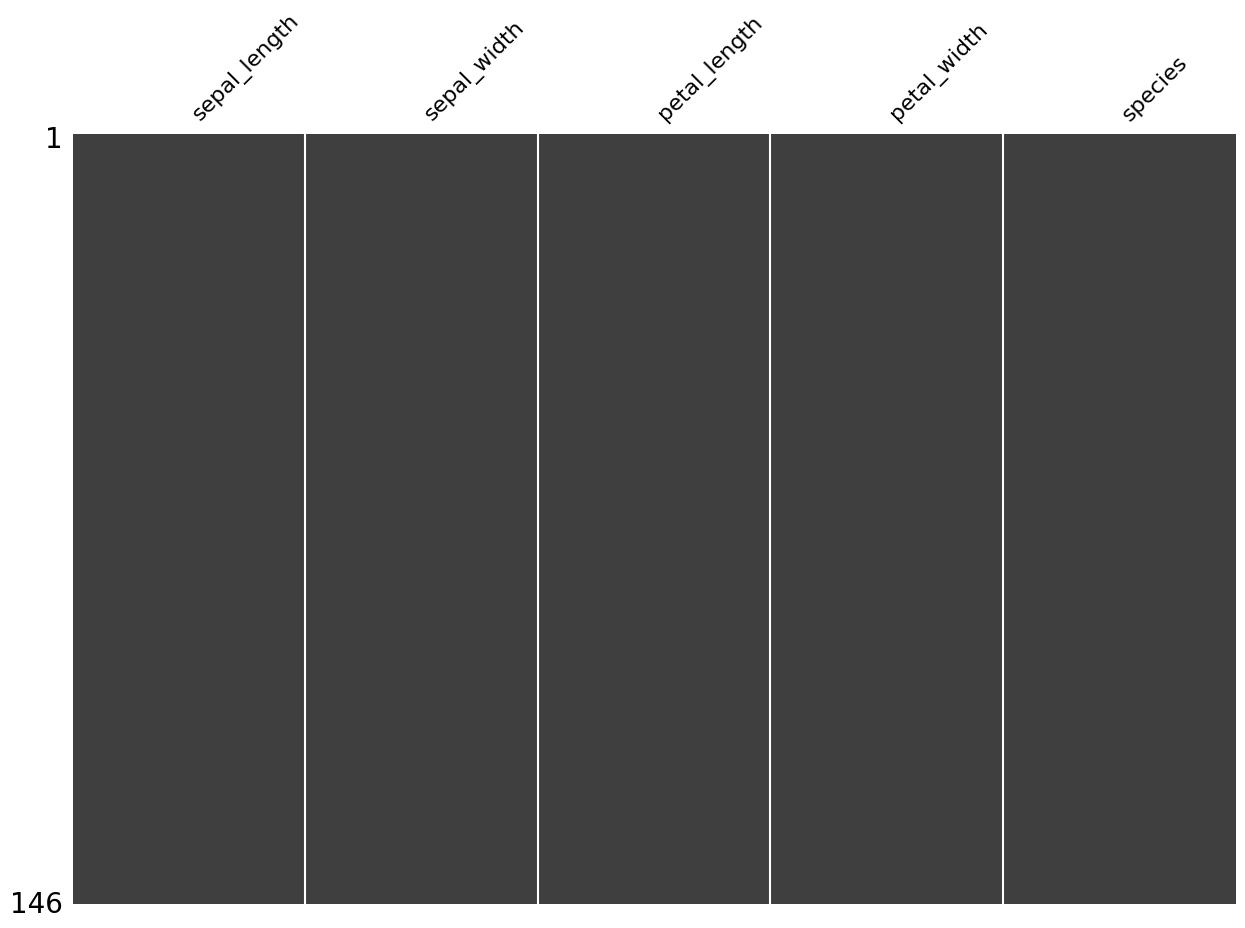

In [47]:
import missingno as msno
print(dataset.isnull().sum())
msno.matrix(dataset,figsize=(15,10),sparkline=False,p=0)
print(dataset.shape)

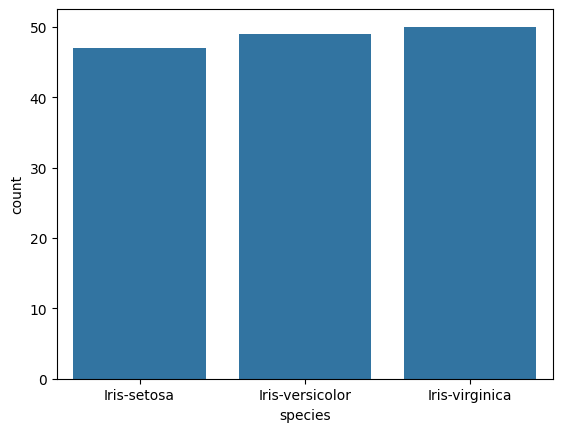

In [53]:
sns.countplot(x='species', data=dataset)
plt.show()

MODEL BUILDING AND EVALUATION

In [48]:
from sklearn.model_selection import train_test_split
X=dataset.iloc[:,0:4]
Y=dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=0,train_size=0.70)

In [49]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)
model.fit(X_train, Y_train)
y_train_pred = model.predict(X_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_train = accuracy_score(Y_train, y_train_pred)
classification_report_str_train = classification_report(Y_train, y_train_pred)
conf_matrix_train = confusion_matrix(Y_train, y_train_pred)


print("Evaluation Metrics for Training Set:")
print(f"Accuracy: {accuracy_train}")
print("Classification Report:\n", classification_report_str_train)
print("Confusion Matrix:\n", conf_matrix_train)

Evaluation Metrics for Training Set:
Accuracy: 0.9803921568627451
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      0.94      0.97        33
 Iris-virginica       0.95      1.00      0.97        38

       accuracy                           0.98       102
      macro avg       0.98      0.98      0.98       102
   weighted avg       0.98      0.98      0.98       102

Confusion Matrix:
 [[31  0  0]
 [ 0 31  2]
 [ 0  0 38]]


In [50]:
y_test_pred = model.predict(X_test)

accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_str_test = classification_report(Y_test, y_test_pred)
conf_matrix_test = confusion_matrix(Y_test, y_test_pred)

print("Evaluation Metrics for Test Set:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_report_str_test)
print("Confusion Matrix:\n", conf_matrix_test)

Evaluation Metrics for Test Set:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        44
      macro avg       1.00      1.00      1.00        44
   weighted avg       1.00      1.00      1.00        44

Confusion Matrix:
 [[16  0  0]
 [ 0 16  0]
 [ 0  0 12]]


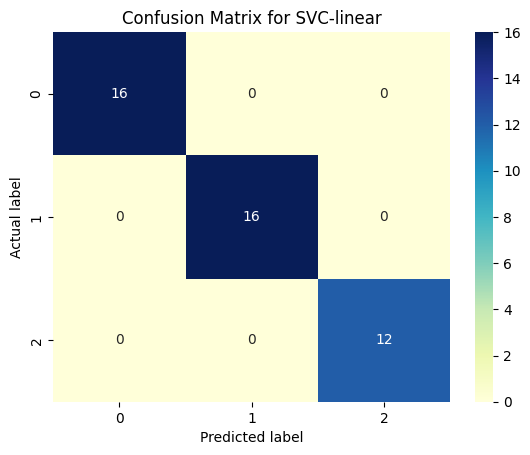

In [51]:
cm = confusion_matrix(Y_test, y_test_pred)
class_names = [0, 1, 2]
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix for SVC-linear')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.xticks(np.arange(len(class_names)) + 0.5, class_names)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names)
plt.show()